<a href="https://colab.research.google.com/github/franconoronha/treinamento-h2ia/blob/main/0_Introdu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Numpy**

Biblioteca para computação científica em Python. Provém objetos que representam arrays multidimensionais com seus próprios métodos.

In [ ]:
import numpy as np

Algumas manipulações básicas de arrays:

In [ ]:
# Podemos criar um array fornecendo uma lista para o método array
a = np.array([[1,2,3], [4,5,6]])
print(a)

# Acessar seus elementos com tuplas de números inteiros
print(a[0, 2])

# Verificar seu formato (tupla com o tamanho de suas dimensões)
print(a.shape)

[[1 2 3]
 [4 5 6]]
3
(2, 3)


In [ ]:
# Criar arrays com características específicas
z = np.zeros((2,2)) # Cria um array de formato (2,2) com 0's
print(z)

i = np.eye(3)       # Cria uma matriz identidade de formato (3,3)
print(i)

[[0. 0.]
 [0. 0.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Indexamento

Apenas um comentário que o tutorial diz que os arrays do numpy são indexados por tuplas de números inteiros não-negativos ("...and is indexed by a tuple of nonnegative integers"), porém pelo que eu tentei dá para indexar por números negativos como nas listas do python.

In [ ]:
# Índice do primeiro elemento da direita para esquerda da primeira linha
print(a[0,-1]) 

3


**Indexamento por partições**

Podemos criar partições de arrays como nas listas do python, porém no numpy as partições funcionam como uma visualização do array original, logo alterar seus elementos altera também as suas respectivas posições no array original.

In [ ]:
p = a[1:2, :2] # Cria uma partição de formato (1,2)
# A notação de : é a mesma das listas do python
print(p)
p[0,0] = 0
print(a)

[[4 5]]
[[1 2 3]
 [0 5 6]]


In [ ]:
p2 = a[0,:] # Uma partição criada com um número inteiro, tem menos dimensões que o array original
print(p2.shape)
print(p2)   # Nesse caso a partição é um array unidimensional da primeira linha do original

(3,)
[1 2 3]


**Indexamento por arrays de inteiros**

In [ ]:
# Podemos selecionar multiplos valores formados por pares de elementos de 2 arrays do mesmo tamanho
a[[0,1,0], [0,1,2]] += 1 # Produz os pares [0,0] [1,1] [0,2] e aplica a operação sobre eles

p3 = a[[0,1,0], [0,1,2]] # Porém ao atribuirmos o array produzido por essa seleção a uma variável...
print(p3) # Esse array não tem conexão com o array original
p3[0] = 2 # Alterar seus elementos não modifica o original

# Bem, atribuindo não tem, mas dá pra usar essa seleção para modificar esses elementos especificos
# a[[0,1,0], [0,1,2]] += 1

print(a)

[2 6 4]
[[2 2 4]
 [0 6 6]]


**Indexamento booleano**

Utiliza um array booleano de mesmo formato para filtrar os elementos que satisfazem uma condição.

In [ ]:
bool_array = (a < 3) # Cria um array booleano fazendo a comparação a cada elemento 
print(bool_array)
print(a[bool_array]) # Seleciona os elementos que tem True em sua posição correspondente

[[ True  True False]
 [ True False False]]
[[11 12  3]
 [10  5  6]]


# **Tipos de dados**

Os arrays do numpy são tipados dinamicamente por padrão, porém podemos forçar seus tipos pelo parâmetro dtype.

In [ ]:
array_d = np.array([1,2,"a"]) # Array tipado dinamicamente para suportar os elementos
print(array_d.dtype)
 
array_32 = np.array([1,2,3], dtype=np.int32) # Array tipado manualmente
# Declarar com um elemento string resultaria em um erro
print(array_32.dtype)

<U21
int32


# **Operações com arrays**

Podemos realizar operações básicas sobre cada elemento do array, utilizando os operadores comuns ou métodos do numpy

In [ ]:
b = [[5,10,15], [15,10,5]]
print(a + b)
print(np.add(a, b))
a += b
print(a)

print(a * 2) # Podemos também realizar operações entre cada elemento do array e um valor

[[ 45  72 109]
 [ 95  76  51]]
[[ 45  72 109]
 [ 95  76  51]]
[[ 45  72 109]
 [ 95  76  51]]
[[ 90 144 218]
 [190 152 102]]


Nesse caso o operador * funciona como multiplicação de elementos e não de matrizes. Para realizar essas operações utiliza-se o operador @ ou o método dot.

O numpy consta também com diversas funções que operam sobre o array.

In [ ]:
print(np.maximum(a,b))  # Retorna o maior de cada posição entre os 2 arrays
print(np.log(b))        # Logaritmo natural de cada elemento do array
print(a.T)              # Matriz transposta
# etc....

[[ 45  72 109]
 [ 95  76  51]]
[[1.60943791 2.30258509 2.7080502 ]
 [2.7080502  2.30258509 1.60943791]]
[[ 45  95]
 [ 72  76]
 [109  51]]


# **Broadcasting**

Broadcasting se refere a como o Numpy lida com arrays de formatos diferentes. Nesse caso a dimensão menor será repetida através da dimensão maior.



In [ ]:
br1 = np.array([[10,20,30], [40,50,60]])
br2 = np.array((1,2,3))

print(br1.shape, br2.shape)
print(br1 * br2)
# O array [1,2,3] foi repetido em sua menor dimensão 3x1
# Para um array (2,3) [[1,2,3], [1,2,3]]

(2, 3) (3,)
[[ 10  40  90]
 [ 40 100 180]]


# **Matplotlib** 

Biblioteca para criação de gráficos variados.

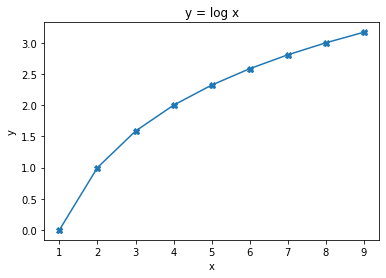

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(1, 10)
y = np.log2(x)

plt.xlabel("x")
plt.ylabel("y")
plt.title("y = log x")
plt.plot(x,y, marker="X")
#plt.fill_between(x, y, 0, facecolor='g', alpha=0.7)

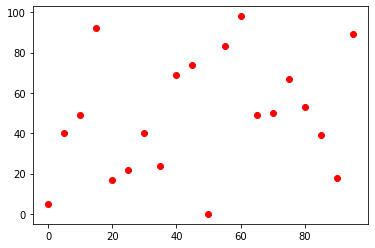

In [ ]:
x1 = np.arange(0,100,5)
y1 = np.random.randint(100, size=x1.shape)

plt.scatter(x1,y1, color="red")

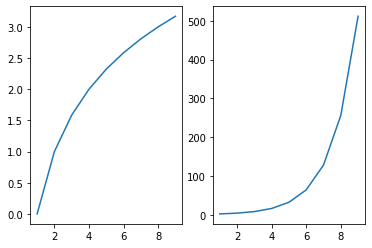

In [ ]:
y2 = np.exp2(x)

plt.subplot(1,2,1) # grid de tamanho 1x2, gráfico a ser definido a seguir é o primeiro
plt.plot(x,y)

plt.subplot(1,2,2) # segundo
plt.plot(x,y2)

#plt.show() é chamado por padrão no colab pelo jeito